# Objective

Determine the good measurement for flow cell "dirtiness" (i.e., how badly the background is contaminated by those small bright specks that build up).

# Contents

This notebook shows each image and six different possible metrics for the dirtiness of that image. The six metrics shown here are the following:
- `image_name`: summing the image without filtering
- `sum_filtered1`: summing the image with a bandpass filter to enhance the speckles
- `sum_filtered2`: summing the image with two bandpass filters to remove the "ghosts"
- `sum_filtered2`: summing the binarized image without filtering
- `sum_filtered2`: summing the binarized image with a bandpass filter to enhance the speckles
- `sum_bin_filtered2`: summing the binarized image with two bandpass filters to remove the "ghosts"

At the bottom of the notebook is a plot for each metric with the image name on the vertical axis ticks.

# Results

There’s definite a clearer pattern of dirtiness is definitely increasing from lane 1 to lane 7 as expected in the last two plots, which are the ones for (1) summing the hot areas of an image that was binarized after application of a bandpass filter and (2) summing the hot areas of an image that was binarized after application of the first bandpass filter and also another one to remove the "ghosts.” So those two metrics are possibilities for measuring the dirtiness of the flow cells.

In [1]:
from skimage.io import imread, imsave
from skimage.util import img_as_float
from skimage.filters import difference_of_gaussians, threshold_otsu
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)
    return img[starty:starty+cropy,startx:startx+cropx]

In [3]:
cropx, cropy = 1448, 1448
sig_min = 1
sig_max1 = 12
sig_max2 = 3

base_dir = '2022-04-27_GB20106_backgrounds_processed'
cols = ['image_name',
        'run_no',
        'lane_no',
        'binarization_threshold',
        'sum_bin_filtered2']

In [4]:
run_dirs = sorted(os.listdir(base_dir))
if '.DS_Store' in run_dirs:
    run_dirs.remove('.DS_Store')

In [5]:
dirtinesses = {i: [] for i in range(8)}

for i, run_dir in enumerate(run_dirs):
    print(run_dir, '\t%d/%d' % (i, len(run_dirs)))
    data_dir = '%s/%s' % (base_dir, run_dir)
    image_names = sorted(os.listdir(data_dir))
    for image_name in image_names:
        if image_name[-6]!='-':
            continue
        lane_no = int(image_name.rsplit(".", 1)[0].rsplit("-", 1)[-1])

        path = '%s/%s' % (data_dir, image_name)
        image = imread(path)

        image_cropped = crop_center(image,cropx,cropy)
        filtered1_image = difference_of_gaussians(image_cropped, sig_min, sig_max1)
        filtered2_image = difference_of_gaussians(filtered1_image, sig_min, sig_max2)
        #filtered2_image = difference_of_gaussians(image_cropped, .1, 1.)
        filtered2_image[filtered2_image < 0.] = 0.
        binarization_threshold = 0.05

        filtered2_binary = filtered2_image > binarization_threshold
        
        #image_cropped_path = '%s/%s_cropped.jpg' % (data_dir, image_name[:-4])
        #imsave(image_cropped_path, image_cropped)
        image_processed_path = '%s/%s_processed.tif' % (data_dir, image_name[:-4])
        imsave(image_processed_path, filtered2_binary)

        sum_bin_filtered2 = np.sum(filtered2_binary)    

        dirtinesses[lane_no].append((image_name, sum_bin_filtered2))
        print('\t%s\tdirtiness = %d\tthresh = %f' % (image_name, sum_bin_filtered2, binarization_threshold))


20220106-104444 	0/83
	background-20220106-104444-0.tif	dirtiness = 366	thresh = 0.050000
	background-20220106-104444-1.tif	dirtiness = 780	thresh = 0.050000
	background-20220106-104444-2.tif	dirtiness = 673	thresh = 0.050000
	background-20220106-104444-3.tif	dirtiness = 1829	thresh = 0.050000
	background-20220106-104444-4.tif	dirtiness = 504	thresh = 0.050000
	background-20220106-104444-5.tif	dirtiness = 1511	thresh = 0.050000
	background-20220106-104444-6.tif	dirtiness = 511	thresh = 0.050000
	background-20220106-104444-7.tif	dirtiness = 475	thresh = 0.050000
20220107-111707 	1/83
	background-20220107-111707-0.tif	dirtiness = 381	thresh = 0.050000
	background-20220107-111707-1.tif	dirtiness = 902	thresh = 0.050000
	background-20220107-111707-2.tif	dirtiness = 488	thresh = 0.050000
	background-20220107-111707-3.tif	dirtiness = 1843	thresh = 0.050000
	background-20220107-111707-4.tif	dirtiness = 619	thresh = 0.050000
	background-20220107-111707-5.tif	dirtiness = 1041	thresh = 0.050000


	background-20220125-103433-3.tif	dirtiness = 1878	thresh = 0.050000
	background-20220125-103433-4.tif	dirtiness = 621	thresh = 0.050000
	background-20220125-103433-5.tif	dirtiness = 2548	thresh = 0.050000
	background-20220125-103433-6.tif	dirtiness = 2388	thresh = 0.050000
	background-20220125-103433-7.tif	dirtiness = 1677	thresh = 0.050000
20220125-123653 	15/83
	background-20220125-123653-0.tif	dirtiness = 721	thresh = 0.050000
	background-20220125-123653-1.tif	dirtiness = 2524	thresh = 0.050000
	background-20220125-123653-2.tif	dirtiness = 805	thresh = 0.050000
	background-20220125-123653-3.tif	dirtiness = 1915	thresh = 0.050000
	background-20220125-123653-4.tif	dirtiness = 889	thresh = 0.050000
	background-20220125-123653-5.tif	dirtiness = 2510	thresh = 0.050000
	background-20220125-123653-6.tif	dirtiness = 2416	thresh = 0.050000
	background-20220125-123653-7.tif	dirtiness = 1742	thresh = 0.050000
20220126-185112 	16/83
	background-20220126-185112-0.tif	dirtiness = 979	thresh = 0.

	background-20220203-195505-6.tif	dirtiness = 2452	thresh = 0.050000
	background-20220203-195505-7.tif	dirtiness = 2013	thresh = 0.050000
20220204-131050 	29/83
	background-20220204-131050-0.tif	dirtiness = 1043	thresh = 0.050000
	background-20220204-131050-1.tif	dirtiness = 2820	thresh = 0.050000
	background-20220204-131050-2.tif	dirtiness = 2136	thresh = 0.050000
	background-20220204-131050-3.tif	dirtiness = 3769	thresh = 0.050000
	background-20220204-131050-4.tif	dirtiness = 1693	thresh = 0.050000
	background-20220204-131050-5.tif	dirtiness = 2666	thresh = 0.050000
	background-20220204-131050-6.tif	dirtiness = 2491	thresh = 0.050000
	background-20220204-131050-7.tif	dirtiness = 2037	thresh = 0.050000
20220208-111139 	30/83
	background-20220208-111139-0.tif	dirtiness = 963	thresh = 0.050000
	background-20220208-111139-1.tif	dirtiness = 2351	thresh = 0.050000
	background-20220208-111139-2.tif	dirtiness = 1402	thresh = 0.050000
	background-20220208-111139-3.tif	dirtiness = 3395	thresh 

	background-20220301-181652-0.tif	dirtiness = 2064	thresh = 0.050000
	background-20220301-181652-1.tif	dirtiness = 4902	thresh = 0.050000
	background-20220301-181652-2.tif	dirtiness = 3044	thresh = 0.050000
	background-20220301-181652-3.tif	dirtiness = 6303	thresh = 0.050000
	background-20220301-181652-4.tif	dirtiness = 21769	thresh = 0.050000
	background-20220301-181652-5.tif	dirtiness = 4048	thresh = 0.050000
	background-20220301-181652-6.tif	dirtiness = 32771	thresh = 0.050000
	background-20220301-181652-7.tif	dirtiness = 29795	thresh = 0.050000
20220301-204852 	44/83
	background-20220301-204852-0.tif	dirtiness = 2835	thresh = 0.050000
	background-20220301-204852-1.tif	dirtiness = 5145	thresh = 0.050000
	background-20220301-204852-2.tif	dirtiness = 3226	thresh = 0.050000
	background-20220301-204852-3.tif	dirtiness = 5693	thresh = 0.050000
	background-20220301-204852-4.tif	dirtiness = 3681	thresh = 0.050000
	background-20220301-204852-5.tif	dirtiness = 4231	thresh = 0.050000
	backgro

	background-20220311-132047-3.tif	dirtiness = 6461	thresh = 0.050000
	background-20220311-132047-4.tif	dirtiness = 2667	thresh = 0.050000
	background-20220311-132047-5.tif	dirtiness = 3674	thresh = 0.050000
	background-20220311-132047-6.tif	dirtiness = 2398	thresh = 0.050000
	background-20220311-132047-7.tif	dirtiness = 4854	thresh = 0.050000
20220311-144514 	58/83
	background-20220311-144514-0.tif	dirtiness = 1908	thresh = 0.050000
	background-20220311-144514-1.tif	dirtiness = 2361	thresh = 0.050000
	background-20220311-144514-2.tif	dirtiness = 1974	thresh = 0.050000
	background-20220311-144514-3.tif	dirtiness = 6441	thresh = 0.050000
	background-20220311-144514-4.tif	dirtiness = 2899	thresh = 0.050000
	background-20220311-144514-5.tif	dirtiness = 3495	thresh = 0.050000
	background-20220311-144514-6.tif	dirtiness = 2471	thresh = 0.050000
	background-20220311-144514-7.tif	dirtiness = 3958	thresh = 0.050000
20220311-163346 	59/83
	background-20220311-163346-0.tif	dirtiness = 1983	thresh

	background-20220404-151439-6.tif	dirtiness = 724	thresh = 0.050000
	background-20220404-151439-7.tif	dirtiness = 665	thresh = 0.050000
20220408-153623 	72/83
	background-20220408-153623-0.tif	dirtiness = 1100	thresh = 0.050000
	background-20220408-153623-1.tif	dirtiness = 1079	thresh = 0.050000
	background-20220408-153623-2.tif	dirtiness = 623	thresh = 0.050000
	background-20220408-153623-3.tif	dirtiness = 2199	thresh = 0.050000
	background-20220408-153623-4.tif	dirtiness = 649	thresh = 0.050000
	background-20220408-153623-5.tif	dirtiness = 706	thresh = 0.050000
	background-20220408-153623-6.tif	dirtiness = 723	thresh = 0.050000
	background-20220408-153623-7.tif	dirtiness = 469	thresh = 0.050000
20220411-160057 	73/83
	background-20220411-160057-0.tif	dirtiness = 3716	thresh = 0.050000
	background-20220411-160057-1.tif	dirtiness = 923	thresh = 0.050000
	background-20220411-160057-2.tif	dirtiness = 564	thresh = 0.050000
	background-20220411-160057-3.tif	dirtiness = 1918	thresh = 0.0500

In [6]:
dirtinesses[0]

[('background-20220106-104444-0.tif', 366),
 ('background-20220107-111707-0.tif', 381),
 ('background-20220107-141754-0.tif', 551),
 ('background-20220110-160013-0.tif', 614),
 ('background-20220112-105942-0.tif', 648),
 ('background-20220112-132037-0.tif', 1189),
 ('background-20220112-143742-0.tif', 640),
 ('background-20220112-161238-0.tif', 634),
 ('background-20220113-143848-0.tif', 673),
 ('background-20220114-143015-0.tif', 635),
 ('background-20220114-162658-0.tif', 608),
 ('background-20220121-103409-0.tif', 687),
 ('background-20220121-125117-0.tif', 711),
 ('background-20220124-122801-0.tif', 703),
 ('background-20220125-103433-0.tif', 880),
 ('background-20220125-123653-0.tif', 721),
 ('background-20220126-185112-0.tif', 979),
 ('background-20220126-201638-0.tif', 937),
 ('background-20220127-112521-0.tif', 1092),
 ('background-20220127-141305-0.tif', 1095),
 ('background-20220128-211350-0.tif', 656),
 ('background-20220128-225343-0.tif', 1099),
 ('background-20220131-12420

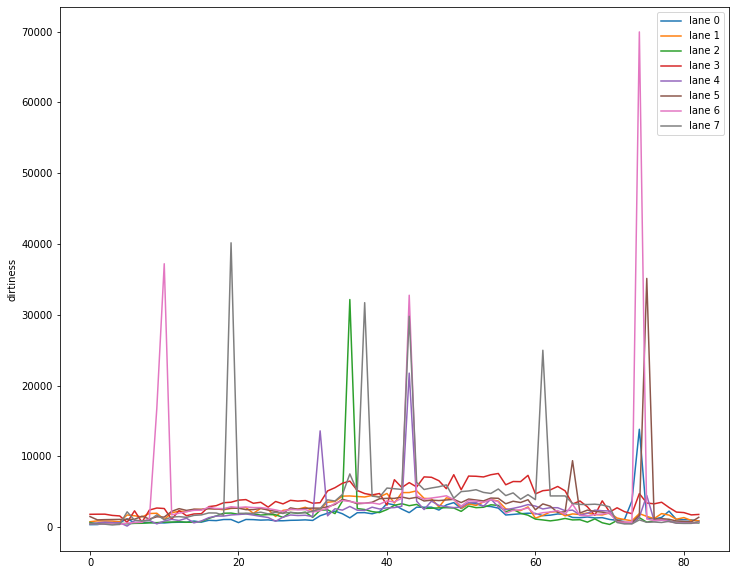

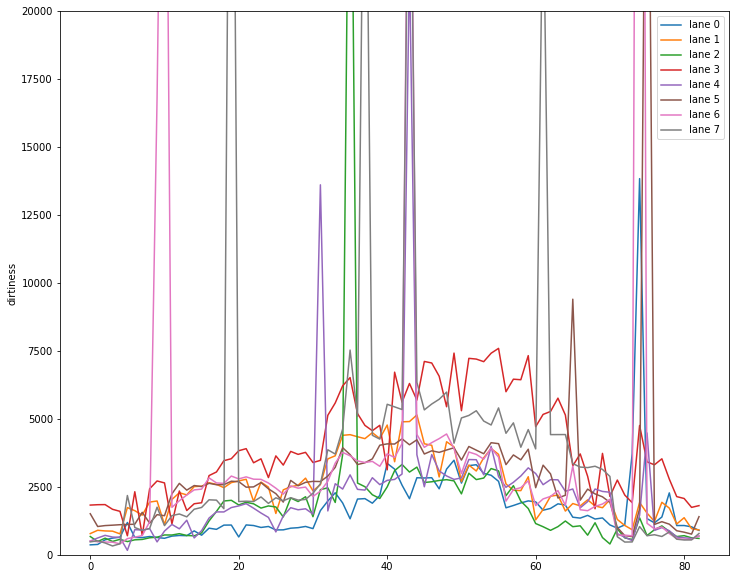

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12.,10.))
for lane_no, rows in dirtinesses.items():
    if not rows:
        continue
    xs, ys = zip(*rows)
    ts = range(len(xs)) # TODO: Calculate timestamps
    plt.plot(ts, ys, label=f"lane {lane_no}")
plt.ylabel('dirtiness')
# TODO: Add markers for historical events
plt.legend()
plt.show()

# Plot again with y range clipped
plt.figure(figsize=(12.,10.))
for lane_no, rows in dirtinesses.items():
    if not rows:
        continue
    xs, ys = zip(*rows)
    ts = range(len(xs)) # TODO: Calculate timestamps
    plt.plot(ts, ys, label=f"lane {lane_no}")
plt.ylabel('dirtiness')
# TODO: Add markers for historical events
plt.ylim(0., 20000.)
plt.legend()
plt.show()

# Investigating images with high dirtiness values

In [8]:
high_dirtiness_thresh = 20000
fnames_high_dirtiness = []
vals_high_dirtiness = []
for lane_no, rows in dirtinesses.items():
    if not rows:
            continue
    for fname, dirtiness_val in rows:
        if dirtiness_val > high_dirtiness_thresh:
            fnames_high_dirtiness.append(fname)
            vals_high_dirtiness.append(dirtiness_val)
            print('%s\t%d' % (fname, dirtiness_val))

background-20220218-152118-2.tif	32162
background-20220301-181652-4.tif	21769
background-20220418-152413-5.tif	35147
background-20220114-162658-6.tif	37219
background-20220301-181652-6.tif	32771
background-20220413-155750-6.tif	69965
background-20220127-141305-7.tif	40177
background-20220222-172341-7.tif	31720
background-20220301-181652-7.tif	29795
background-20220316-141612-7.tif	25000


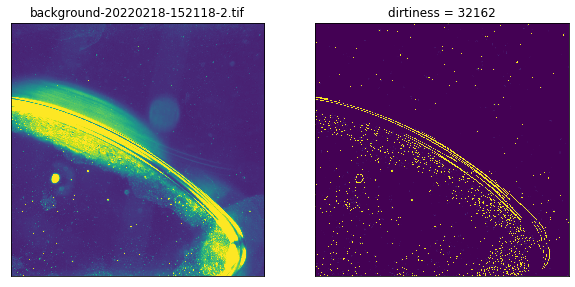

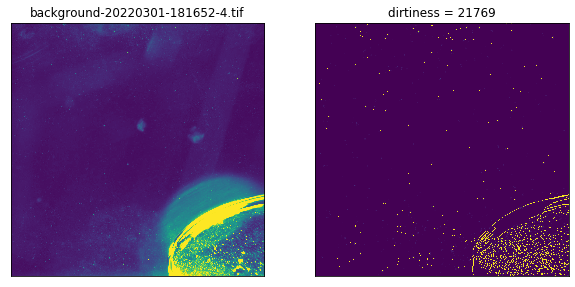

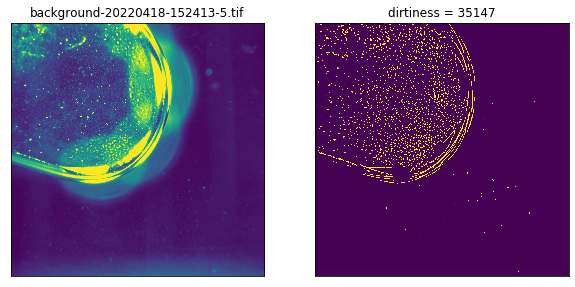

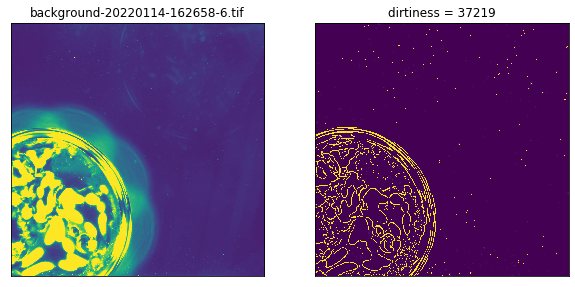

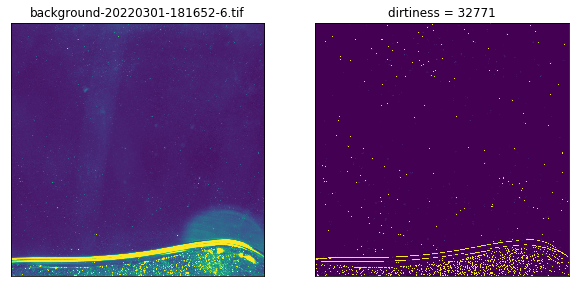

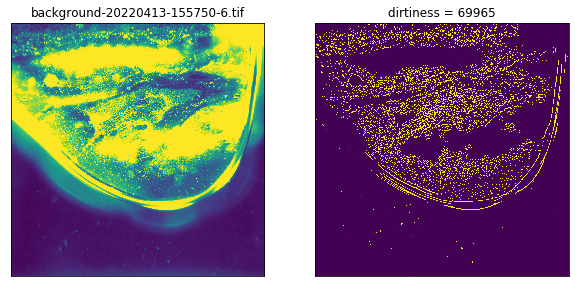

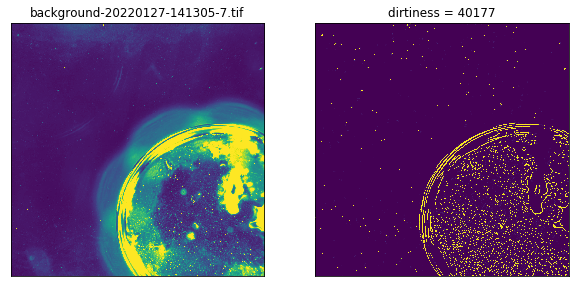

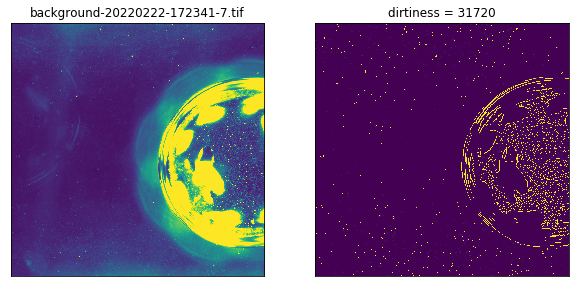

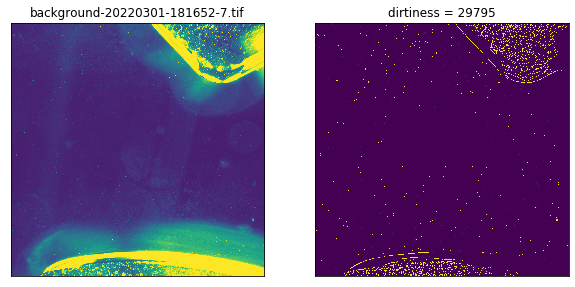

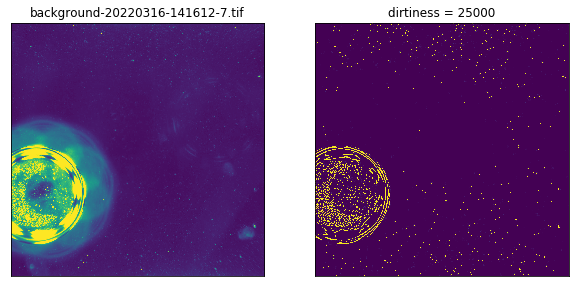

In [9]:
for fname, val in zip(fnames_high_dirtiness, vals_high_dirtiness):
    run_no = fname[11:26]
    path_cropped = base_dir + '/' + run_no + '/' + fname[:-4] + '_cropped.jpg'
    path_processed = base_dir + '/' + run_no + '/' + fname[:-4] + '_processed.jpg'
    im_cropped = imread(path_cropped)
    im_processed = imread(path_processed)
    
    fig, axs = plt.subplots(1,2, figsize=(10,14))
    axs[0].imshow(im_cropped)
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[0].set_title(fname)
    
    axs[1].imshow(im_processed)
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    axs[1].set_title('dirtiness = %d'% val)

    plt.show()

# Investigating images with normal dirtiness values

In [10]:
normal_dirtiness_lo, normal_dirtiness_hi = 5000, 5200 # somewhat arbitrary 'very normal dirtiness' range
fnames_normal_dirtiness = []
vals_normal_dirtiness = []
for lane_no, rows in dirtinesses.items():
    if not rows:
            continue
    for fname, dirtiness_val in rows:
        if dirtiness_val > normal_dirtiness_lo and dirtiness_val < normal_dirtiness_hi:
            fnames_normal_dirtiness.append(fname)
            vals_normal_dirtiness.append(dirtiness_val)
            print('%s\t%d' % (fname, dirtiness_val))

background-20220301-204852-1.tif	5145
background-20220209-120457-3.tif	5132
background-20220222-145113-3.tif	5197
background-20220316-141612-3.tif	5165
background-20220322-123617-3.tif	5143
background-20220222-145113-7.tif	5092
background-20220304-141419-7.tif	5035
background-20220304-144308-7.tif	5127


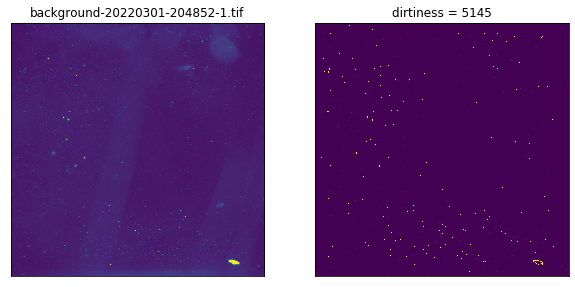

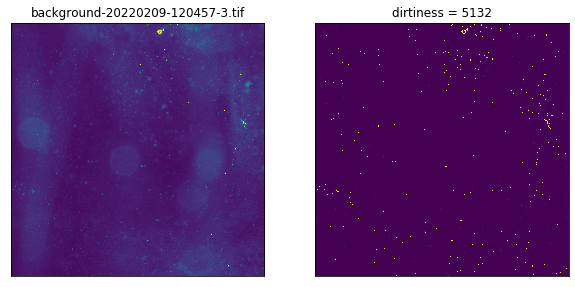

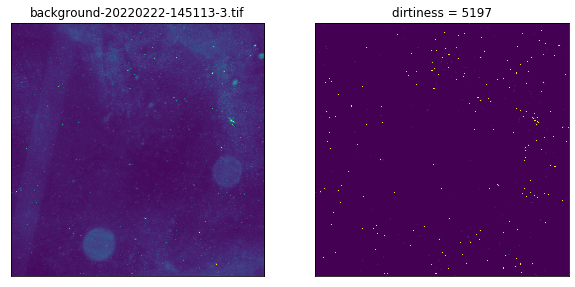

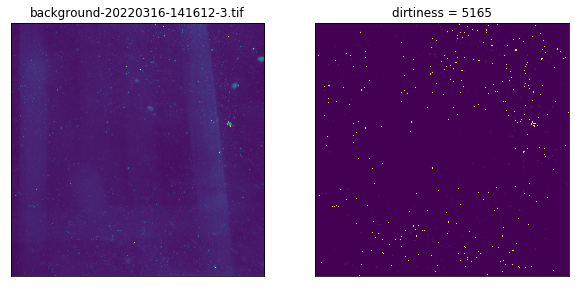

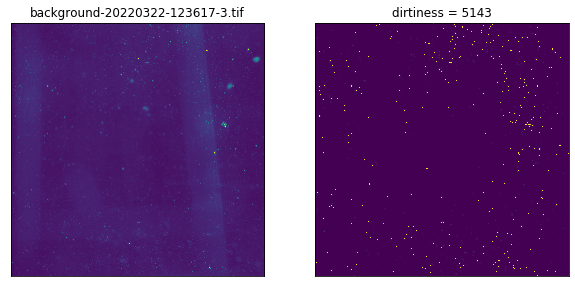

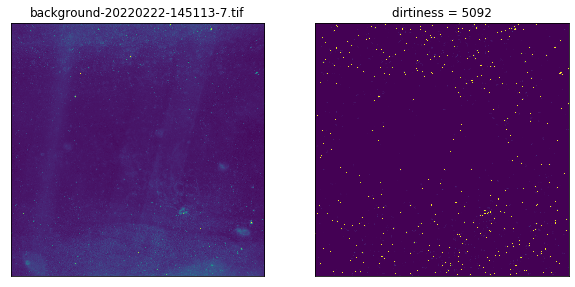

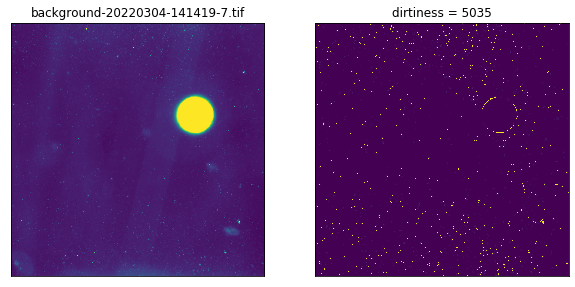

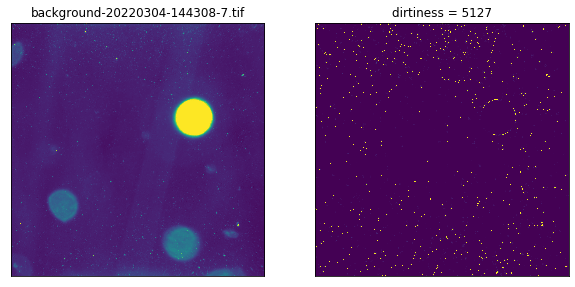

In [11]:
for fname, val in zip(fnames_normal_dirtiness, vals_normal_dirtiness):
    run_no = fname[11:26]
    path_cropped = base_dir + '/' + run_no + '/' + fname[:-4] + '_cropped.jpg'
    path_processed = base_dir + '/' + run_no + '/' + fname[:-4] + '_processed.jpg'
    im_cropped = imread(path_cropped)
    im_processed = imread(path_processed)
    
    fig, axs = plt.subplots(1,2, figsize=(10,14))
    axs[0].imshow(im_cropped)
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[0].set_title(fname)
    
    axs[1].imshow(im_processed)
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    axs[1].set_title('dirtiness = %d'% val)

    plt.show()